# The data set is from kaggle
https://www.kaggle.com/gilsousa/habermans-survival-data-set

### Our obective is to classify the persons who are survived after the surgery and from the persons who are dead after the surgery.

In [1]:
# Importing libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Reading data
df = pd.read_csv("haberman.csv", names=['Age', 'Year', 'Axillary nodes dect', 'Survstatus'])
df

,Age,Year,Axillary nodes dect,Survstatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


## Numbers of datapoints

In [2]:
print(df.shape)
# output indicates (rows, columns)

(306, 4)


## Columns of the dataset

In [3]:
print(df.columns)
# output gives columns name which have assigned and its type

Index(['Age', 'Year', 'Axillary nodes dect', 'Survstatus'], dtype='object')


In [4]:
# We have two classes in Survstatus:
# person who is survived after the surgery.
# person is dead after the surgery.

df['Survstatus'].value_counts()

1    225
2     81
Name: Survstatus, dtype: int64

## 2D scatter

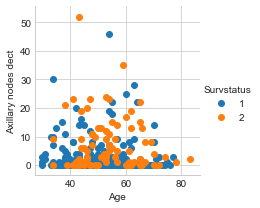

In [5]:
# For Age and Axillary nodes dect

sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Survstatus', size=3) \
    .map(plt.scatter, 'Age', 'Axillary nodes dect') \
    .add_legend()
plt.show()

### Observation:
--> Here 1 and 2 overlapped using Age and Axillary nodes dect features so the classifiaction between both is not possible.

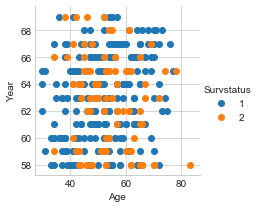

In [6]:
# For Age and Year

sns.set_style('whitegrid')
sns.FacetGrid(df, hue="Survstatus", size=3) \
    .map(plt.scatter, 'Age', 'Year') \
    .add_legend()
plt.show()

### Observation:
--> Here also same overlapping problem like previous one here is also no classification possible.

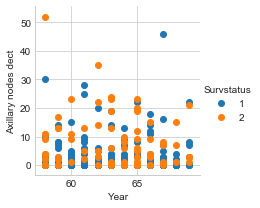

In [7]:
# For Year and Axillary nodes dect
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Survstatus', size=3) \
    .map(plt.scatter, 'Year', 'Axillary nodes dect') \
    .add_legend()
plt.show()

### Observation:
Here also same overlapping problem like previous two here is also no classification possible.

# Pairplots
--> Here we get 3c2 = 3 because 3 for features and out of which we select only 2. Therefore the answer is 3.

--> In the pairplots we not take the principle diagonal graphs but upper diagonal graphs are same as lower diagonal only the change is in the axis.

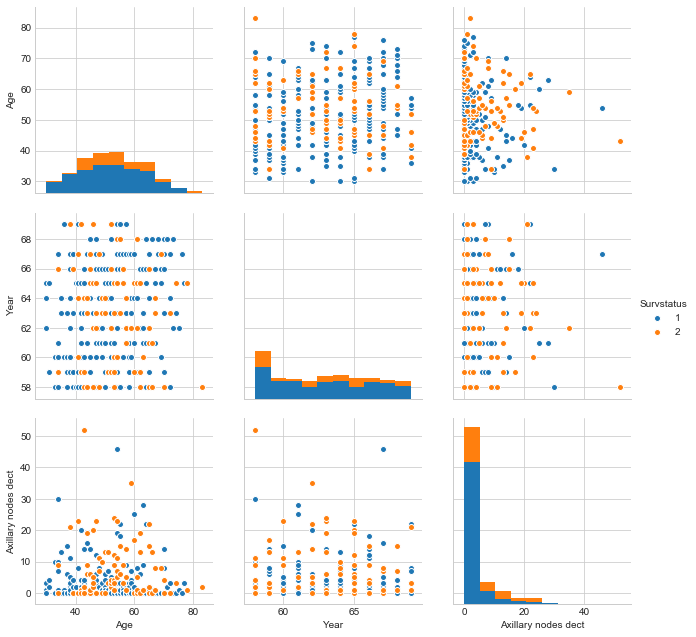

In [8]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df, hue='Survstatus', vars=['Age', 'Year', 'Axillary nodes dect'], size=3)
plt.show()

### 1D scatter
* Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
* Usually the data points are grouped into bins and the height of the bars representing each group increases with increase in the number of data points 
lie within that group. (histogram)
* Probality Density Function (PDF) is the probabilty that the variable takes a value x. (smoothed version of the histogram)
* Kernel Density Estimate (KDE) is the way to estimate the PDF. The area under the KDE curve is 1.
* Here the height of the bar denotes the percentage of data points under the corresponding group


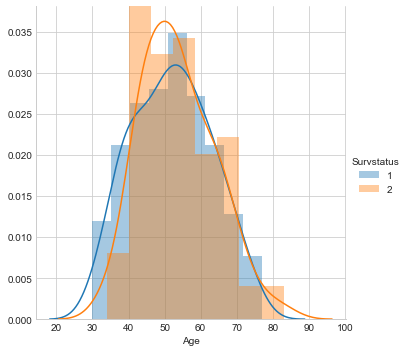

In [9]:
# plotting one dimensionally
sns.FacetGrid(df, hue='Survstatus', size=5) \
    .map(sns.distplot, 'Age') \
    .add_legend()

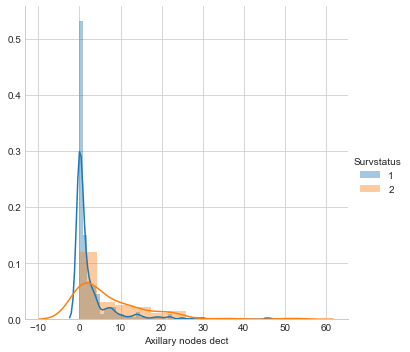

In [10]:
sns.FacetGrid(df, hue='Survstatus', size=5) \
    .map(sns.distplot, 'Axillary nodes dect') \
    .add_legend()

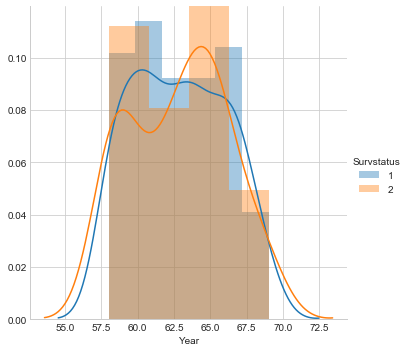

In [11]:
sns.FacetGrid(df, hue='Survstatus', size=5) \
    .map(sns.distplot, 'Year') \
    .add_legend()

--> From the above there figure axillary nodes dect is clear for us, so we can say that probability distribution function(PDF) of 1 is high when compared to 2 

--> If 'Axillary nodes dect' <= 3 then the person is survived else demised.

### CDF (Commulative Distribution Function)

* From above we choose one feature that is Auxillary nodes dect.
* The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.

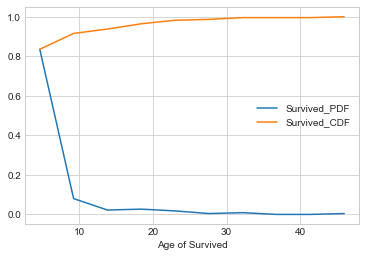

In [12]:
## Analysing more on yearly basis using histogram, PDF and CDF
df_sur = df.loc[df["Survstatus"]==1]
counts, bin_edges = np.histogram(df_sur['Axillary nodes dect'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('survivalstatus')
plt.legend(['Survived_PDF', 'Survived_CDF'])
plt.xlabel("Age of Survived")
plt.show()

#### Observation:
--> From the above graph we can say that 100% of the 1 had less than 40 axillary nodes dect and 4% have less than 10 auxillary nodes dect.

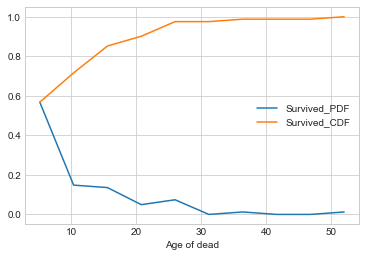

In [13]:
df_dead = df.loc[df['Survstatus']==2]
counts, bin_edges = np.histogram(df_dead['Axillary nodes dect'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('survivalstatus')
plt.legend(['Survived_PDF', 'Survived_CDF'])
plt.xlabel("Age of dead")
plt.show()

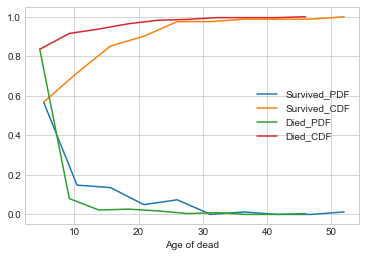

In [14]:
counts, bin_edges = np.histogram(df_dead['Axillary nodes dect'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(df_sur['Axillary nodes dect'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('survstatus')
plt.legend(['Survived_PDF', 'Survived_CDF','Died_PDF', 'Died_CDF'])
plt.xlabel("Age of dead")
plt.show()

### Observation:
* The probablity distribution function(PDF) for the people who survived and those who died different in case of axillary nodes.Hence, axillary nodes is the most important feature to predict the survival status after 5 years.
* The survival rate is extremely high for patients having less than 3 axillary nodes dect.


### Boxplot and Whiskers

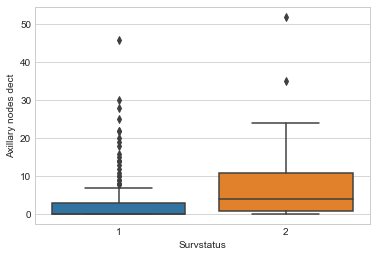

In [15]:
sns.boxplot(x='Survstatus', y='Axillary nodes dect', data=df)
plt.show()

--> Boxplot of 1 had only 75th percentile value at axillary nodes dect is 2 and the 25th and 50th percentiles are overlapped.

--> Boxplot of 2 had only 25th percentile value at axillary nodes dect is 1, 50th percentile value at axillary nodes dectis 3 and 75th percentile value at axillary nodes dect is 11.

### Violin plot
--> It is a graph in which the histogram and boxplot are represent.

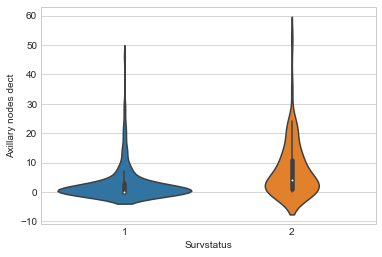

In [16]:
sns.violinplot(x='Survstatus', y='Axillary nodes dect', data=df, size=5)
plt.show()

### Observation
* 50th percentile of survivors have 0 positive nodes, 75th percentie of survivors have less than 3 positive axilary nodes
* 25th percentile of dead have 1 positive axilary node, 50th percentile of dead have positive axilary nodes below 4,
* 75th percentile of dead have positive nodes below 11

## Multivariate probability density, contour plot

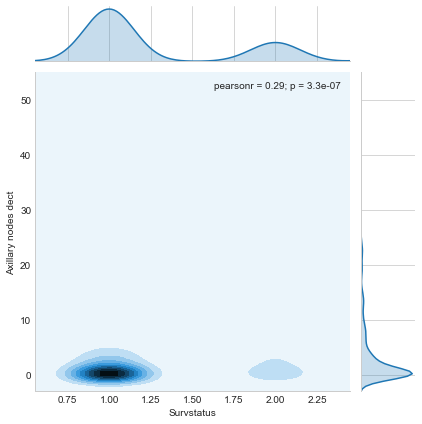

In [17]:
#2D Density plot, contors-plot
sns.jointplot(x="Survstatus", y="Axillary nodes dect", data=df, kind="kde");
plt.show();

### Conclusion
* By plotting all pdf, cdf, box-plot, pair plots, scatter plot etc. we get only one conclusion :
* if number of axillary node is less,than survival of patients is more
* We need more features to comes on very good conlusion.